In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dt = pd.read_csv("clean_data.csv")

In [3]:
dt.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,mileage,max_power,engine,torque,años_antig
0,450000,145500,Diesel,Individual,Manual,First Owner,5.0,23.40,74.00,1248,190.000000,6
1,370000,120000,Diesel,Individual,Manual,Second Owner,5.0,21.14,103.52,1498,250.000000,6
2,158000,140000,Petrol,Individual,Manual,Third Owner,5.0,17.70,78.00,1497,124.544455,14
3,225000,127000,Diesel,Individual,Manual,First Owner,5.0,23.00,90.00,1396,219.668960,10
4,130000,120000,Petrol,Individual,Manual,First Owner,5.0,16.10,88.20,1298,112.776475,13


In [4]:
dt_x = dt.copy().drop(columns=["selling_price"])
y = dt["selling_price"].values

# One Hot Encoding

In [95]:
dt_x

,km_driven,fuel,seller_type,transmission,owner,seats,mileage,max_power,engine,torque,años_antig
0,145500,Diesel,Individual,Manual,First Owner,5.0,23.40,74.00,1248,190.000000,6
1,120000,Diesel,Individual,Manual,Second Owner,5.0,21.14,103.52,1498,250.000000,6
2,140000,Petrol,Individual,Manual,Third Owner,5.0,17.70,78.00,1497,124.544455,14
3,127000,Diesel,Individual,Manual,First Owner,5.0,23.00,90.00,1396,219.668960,10
4,120000,Petrol,Individual,Manual,First Owner,5.0,16.10,88.20,1298,112.776475,13
...,...,...,...,...,...,...,...,...,...,...,...
6185,110000,Petrol,Individual,Manual,First Owner,5.0,18.50,82.85,1197,113.700000,7
6186,119000,Diesel,Individual,Manual,Fourth & Above Owner,5.0,16.80,110.00,1493,235.359600,13
6187,120000,Diesel,Individual,Manual,First Owner,5.0,19.30,73.90,1248,190.000000,11
6188,25000,Diesel,Individual,Manual,First Owner,5.0,23.57,70.00,1396,140.000000,7


In [96]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

#ct = ColumnTransformer(transformers=[("encoder", OneHotEncoder(), ["fuel", "seller_type", "transmission", "owner"])],
#                      remainder="passthrough")
ct = ColumnTransformer(transformers=[("encoder", OneHotEncoder(), [1, 2, 3, 4])],
                      remainder="passthrough")
x = np.array(ct.fit_transform(dt_x))

# División de Sets

In [6]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15)

In [7]:
x_train[10][12]

0.0

# Scalar valores numericos

In [8]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
sc_y = StandardScaler()

x_train_scale = sc_x.fit_transform(x_train[:, 12:])
y_train_scale = sc_y.fit_transform(np.reshape(y_train,(y_train.size,1)))

x_test_scale = sc_x.transform(x_test[:, 12:])
y_test_scale = sc_y.transform(np.reshape(y_test,(y_test.size,1)))


# Modelos

Primero creamos una función para poder graficar la curva de aprendizaje de cada modelo.

## Función Curva de Aprendizaje

In [30]:
from sklearn.model_selection import learning_curve
def plot_learning_curve(estimator, title, X, y, score="neg_mean_squared_error", ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 10) ):
    """
    Generate a simple plot of the test and traning learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel(score)
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring = score,
    shuffle=True)
    
    if score =="neg_mean_squared_error":
        train_scores_mean = -np.mean(train_scores, axis=1)
        train_scores_std = -np.std(train_scores, axis=1)
        test_scores_mean = -np.mean(test_scores, axis=1)
        test_scores_std = -np.std(test_scores, axis=1)
    else:
        train_scores_mean = np.mean(train_scores, axis=1)
        train_scores_std = np.std(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
        test_scores_std = np.std(test_scores, axis=1)
        
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

## Regresión Lineal

In [10]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

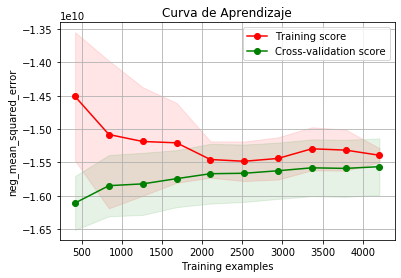

In [11]:
plot_learning_curve(LinearRegression(), "Curva de Aprendizaje", x_train, y_train, score="neg_mean_squared_error",cv=5,
                        n_jobs=4)
plt.show()

In [12]:
from sklearn.metrics import r2_score, mean_absolute_error
r2_score(y_test,lr.predict(x_test))

0.726789909890615

In [13]:
mean_absolute_error(y_test,lr.predict(x_test))

97901.78907634347

In [14]:
from sklearn.model_selection import cross_val_score

resultados = cross_val_score(estimator=LinearRegression(), X= x_train, y=y_train, cv=6, scoring="r2")

print("R2: {:.2f} %".format(resultados.mean()*100))
print("Desviación Estandar: {:.2f} %".format(resultados.std()*100))

R2: 73.75 %
Desviación Estandar: 1.21 %


## Support Vector Regressor

In [15]:
from sklearn.svm import SVR

resultados = cross_val_score(estimator=SVR(kernel="rbf"), X= x_train_scale, y=y_train_scale, cv=6, scoring="r2")

print("R2: {:.2f} %".format(resultados.mean()*100))
print("Desviación Estandar: {:.2f} %".format(resultados.std()*100))

C:\Users\Andres\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Andres\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Andres\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Andres\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usi

R2: 86.22 %
Desviación Estandar: 1.46 %


In [16]:
from sklearn.model_selection import GridSearchCV

parametros = [
    {"kernel": ["linear", "poly", "rbf", "sigmoid"],
    "C": [0.25,0.5,1,2,3,4,5,10]}
]

In [17]:
grid_search = GridSearchCV(estimator = SVR(),
                          param_grid = parametros,
                          scoring = "r2",
                          cv = 5,
                          n_jobs=-1)
grid_search.fit(x_train_scale, y_train_scale)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print("Best Accuracy: ", best_accuracy)
print("Best Parameters: ", best_parameters)

C:\Users\Andres\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Best Accuracy:  0.8689963925681837
Best Parameters:  {'C': 10, 'kernel': 'rbf'}


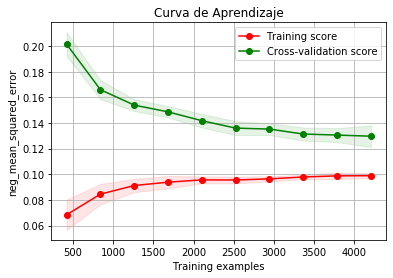

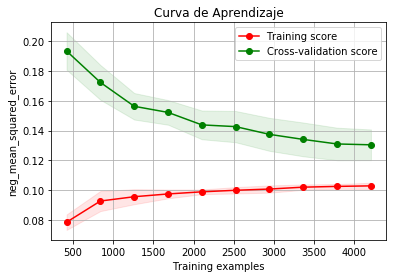

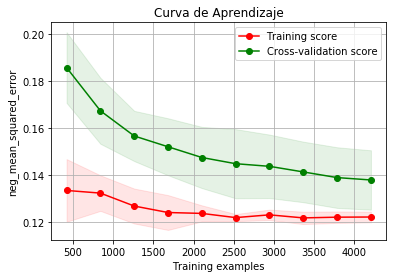

In [60]:
plot_learning_curve(SVR(kernel="rbf", C=20), "Curva de Aprendizaje", x_train_scale, y_train_scale, 
                    score="neg_mean_squared_error", 
                    cv=5, n_jobs=4)
plt.show()
plot_learning_curve(SVR(kernel="rbf", C=10), "Curva de Aprendizaje", x_train_scale, y_train_scale, 
                    score="neg_mean_squared_error", 
                    cv=5, n_jobs=4)
plt.show()

plot_learning_curve(SVR(kernel="rbf"), "Curva de Aprendizaje", x_train_scale, y_train_scale, 
                    score="neg_mean_squared_error", 
                    cv=5, n_jobs=4)
plt.show()

In [76]:
svr = SVR(kernel="rbf", C=10)
svr.fit(x_train_scale, y_train_scale)

C:\Users\Andres\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR(C=10)

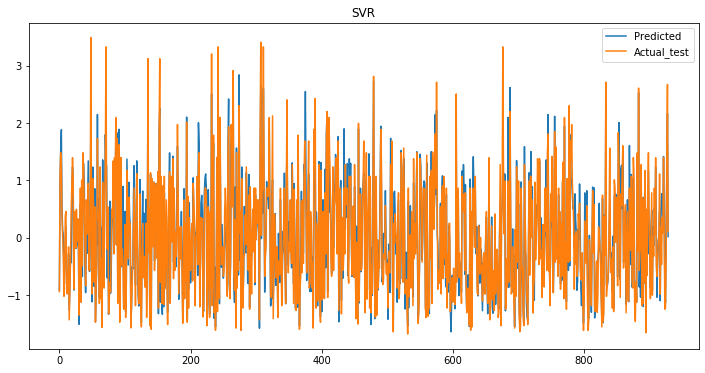

In [77]:
plt.figure(figsize=[12,6])
plt.plot(svr.predict(x_test_scale),label='Predicted')
plt.plot(y_test_scale,label="Actual_test")
plt.legend()
plt.title("SVR")
plt.show()

In [87]:
y_pred_svr = svr.predict(x_test_scale)
y_pred_svr_sc = sc_y.inverse_transform(y_pred_svr)
np.set_printoptions(precision=2)

comparacion_svr = np.concatenate((y_pred_svr_sc.reshape(len(y_pred_svr_sc),1), y_test.reshape(len(y_test),1)), axis=1)

In [88]:
comparacion_svr

array([[ 215289.21,  210000.  ],
       [ 665141.9 ,  700000.  ],
       [ 815204.63,  800000.  ],
       ...,
       [ 685623.92,  800000.  ],
       [ 966914.59, 1090000.  ],
       [ 443672.87,  465000.  ]])

In [89]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test,y_pred_svr_sc))

61849.207259292205


## Random Forest

In [19]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 1200, max_leaf_nodes= 800)
resultados = cross_val_score(estimator=rf, X= x_train, y=y_train, cv=5, scoring="r2")

print("R2: {:.2f} %".format(resultados.mean()*100))
print("Desviación Estandar: {:.2f} %".format(resultados.std()*100))

R2: 91.29 %
Desviación Estandar: 0.76 %


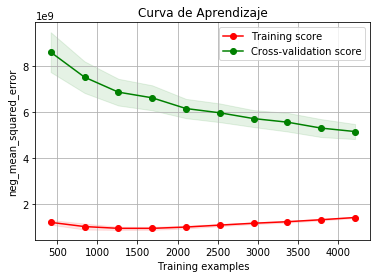

In [32]:
plot_learning_curve(rf, "Curva de Aprendizaje", x_train, y_train, score="neg_mean_squared_error",  cv=5,
                        n_jobs=-1)
plt.show()

In [21]:
rf = RandomForestRegressor(n_estimators = 1200, max_leaf_nodes= 800)
rf.fit(x_train, y_train)

RandomForestRegressor(max_leaf_nodes=800, n_estimators=1200)

In [22]:
parametros = [{'max_depth': range(10,40,10),
               "n_estimators": range(100,1200, 100),
              "max_features":["auto", "sqrt", "log2"],
              "max_leaf_nodes": range(20,1200, 100),
              "bootstrap": [True, False]}]

grid_search = GridSearchCV(estimator = RandomForestRegressor(),
                          param_grid = parametros,
                          scoring = "r2",
                          cv = 5,
                          n_jobs=-1)
grid_search.fit(x_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print("Best Accuracy: ", best_accuracy)
print("Best Parameters: ", best_parameters)

Best Accuracy:  0.9135330607314293
Best Parameters:  {'bootstrap': True, 'max_depth': 30, 'max_features': 'auto', 'max_leaf_nodes': 620, 'n_estimators': 1000}


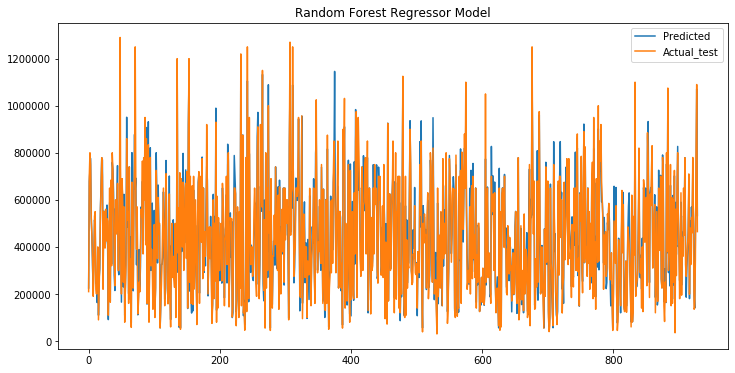

In [26]:
plt.figure(figsize=[12,6])
plt.plot(rf.predict(x_test),label='Predicted')
plt.plot(y_test,label="Actual_test")
plt.legend()
plt.title("Random Forest Regressor Model")
plt.show()

Hacemos pruebas con el modelo con los hiperparametros señalados:

{'bootstrap': True, 'max_depth': 30, 'max_features': 'auto', 'max_leaf_nodes': 620, 'n_estimators': 1000}

In [65]:
rf_final = RandomForestRegressor(n_estimators = 1000, max_leaf_nodes= 620, max_features="auto", max_depth=30, bootstrap=True)

In [66]:
resultados = cross_val_score(estimator=rf_final, X= x_train, y=y_train, cv=5, scoring="r2")

print("R2: {:.2f} %".format(resultados.mean()*100))
print("Desviación Estandar: {:.2f} %".format(resultados.std()*100))

R2: 91.33 %
Desviación Estandar: 0.77 %


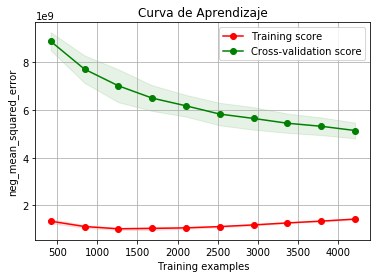

In [67]:
plot_learning_curve(rf_final, "Curva de Aprendizaje", x_train, y_train, score="neg_mean_squared_error",  cv=5,
                        n_jobs=-1)
plt.show()

In [68]:
rf_final.fit(x_train, y_train)

RandomForestRegressor(max_depth=30, max_leaf_nodes=620, n_estimators=1000)

In [90]:
y_pred = rf_final.predict(x_test)
np.set_printoptions(precision=2)

comaparacion = np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)), axis=1)

df_resultados = pd.DataFrame(comaparacion, columns=["ValoresPred", "ValoresReales"])
df_resultados = df_resultados.round(2)
df_resultados["dif"] = abs(df_resultados.ValoresReales - df_resultados.ValoresPred)
df_resultados["dif"].hist()

In [91]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test,y_pred))

50283.7414741286


In [93]:
plt.figure(figsize=(10,7))
feat_importances = pd.Series(rf_final.feature_importances_, index = x_train)
feat_importances.nlargest(7).plot(kind='barh')

ValueError: Length of passed values is 20, index implies 5261

<Figure size 720x504 with 0 Axes>

# Conclusion

Podemos concluir que el algoritmo Random Forest tiene un mejor R-Cuadrado y Mean Absolute Error para predecir los precios de los carros.

Este valor puede mejorar.

# Construir el Pipeline

In [94]:
from sklearn.pipeline import Pipeline

In [97]:
pipeline_model = Pipeline(steps=[("one_hot_encode", ct),
                                 ("random_forest", rf_final)])

In [99]:
pipeline_model.fit(dt_x, y)

Pipeline(steps=[('one_hot_encode',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder', OneHotEncoder(),
                                                  [1, 2, 3, 4])])),
                ('random_forest',
                 RandomForestRegressor(max_depth=30, max_leaf_nodes=620,
                                       n_estimators=1000))])

In [102]:
predecir = [[145500, "Diesel", "Individual", "Manual", "First Owner",	5.0	,23.40,	74.00,	1248, 190.000000, 6]]

In [103]:
pipeline_model.predict(predecir)

array([483253.67])

In [105]:
!pip install joblib

You should consider upgrading via the 'c:\users\andres\anaconda3\python.exe -m pip install --upgrade pip' command.


In [107]:
import joblib
joblib.dump(pipeline_model,"MLPipeline.joblib")

['MLPipeline.joblib']